# Lab 6: Clustering
In this assignment, we will learn two clustering methods: K-means and Agglomerative method.

## 1. Example

### 1.1 Generate a toy dataset with two clusters

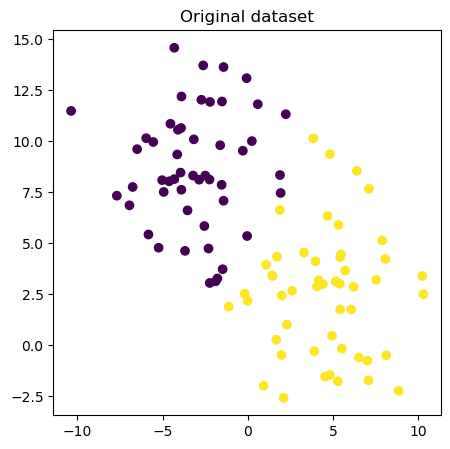

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets


# generate a toy dataset with two clusters
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0, random_state=42)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')
plt.show()


### 1.2 Partition the dataset with K-means

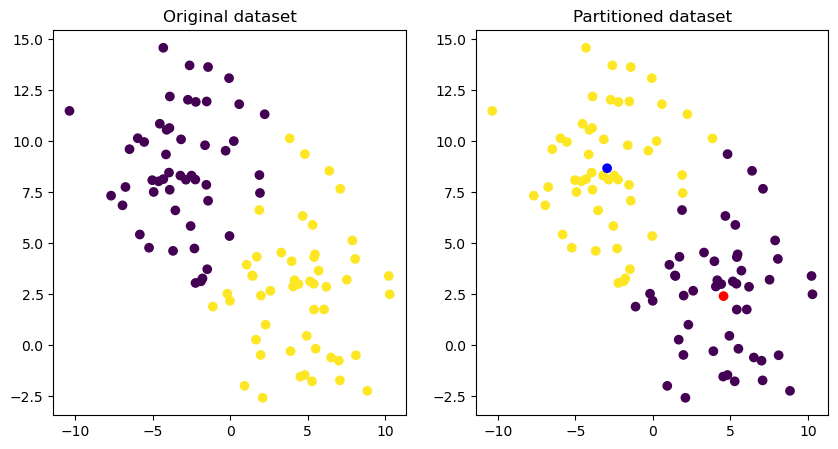

In [2]:
cluster = KMeans(n_clusters=2, random_state=0).fit(X)

centroids = cluster.cluster_centers_  #get the clustering centroids

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['r', 'b'])  #visualize the clustering centroids
plt.title('Partitioned dataset')

plt.show()

In [3]:
from sklearn.metrics.cluster import normalized_mutual_info_score

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

The normalized mutual information score of the K-means method is 0.9291


### 1.3 Partition the dataset with Agglomerative method

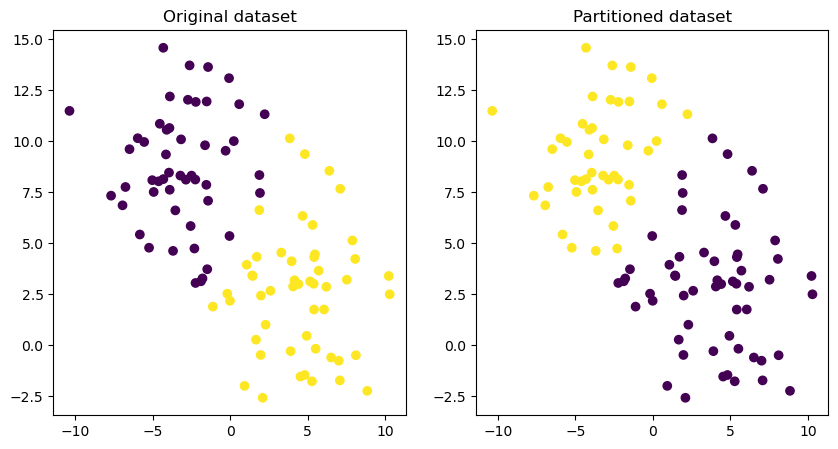

The normalized mutual information score of the Agglomerative method  is 0.6987


In [4]:
cluster = AgglomerativeClustering(n_clusters=2).fit(X)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
plt.title('Partitioned dataset')

plt.show()

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the Agglomerative method  is {:.4f}'.format(nmi))

## 2. Task

### 2.1 Preprocess the raw data
- Check whether there are missing values
- Check whether theare are cateogrical features

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/maryle2002/CIS3715_DataScience_2023/main/Lab05/heart.csv')

In [6]:
# Check whether there are missing values
print(df.isnull().sum())
print("\n\033[1mThere are no missing values")

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values


In [7]:
# Check whether theare are cateogrical features
print(df.info())
print("\n\033[1mThere are no categogrical features")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

There are no categogrical features


In [8]:
from sklearn.preprocessing import StandardScaler

heartData = df.drop('target', axis=1)

normalizer = StandardScaler()
heartData = normalizer.fit_transform(heartData)

### 2.2 Partition the dataset with K-means and compute its NMI

In [9]:
cluster_heart = KMeans(n_clusters=2).fit(heartData)

nmi = normalized_mutual_info_score(cluster_heart.labels_, df['target'], average_method='arithmetic')
print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

The normalized mutual information score of the K-means method is 0.3234


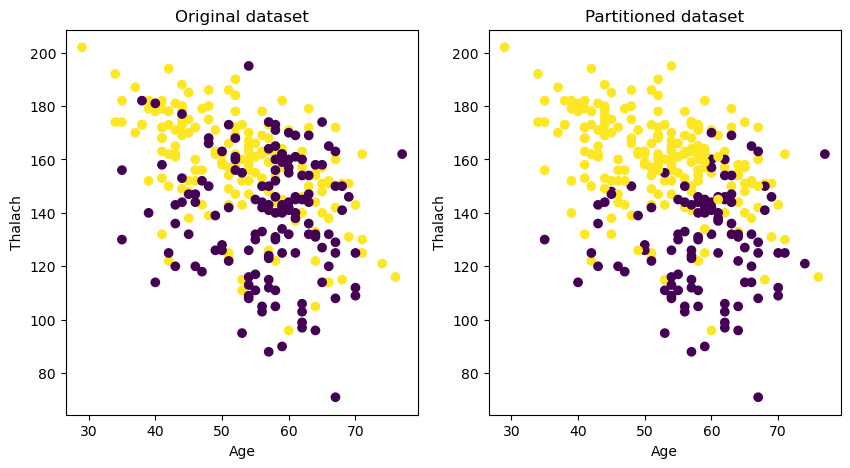

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(df.age, df.thalach, c=df.target)
plt.title('Original dataset')
plt.xlabel('Age')
plt.ylabel('Thalach')

centroids = cluster_heart.cluster_centers_  #get the clustering centroids
plt.subplot(1, 2, 2)
plt.scatter(df.age, df.thalach, c=cluster_heart.labels_)
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.title('Partitioned dataset')

plt.show()

### 2.3 Partition the dataset with Agglomerative method and compute its NMI

In [21]:
cluster_heart = AgglomerativeClustering(n_clusters=2).fit(heartData)

nmi = normalized_mutual_info_score(cluster_heart.labels_, df['target'], average_method='arithmetic')
print('The normalized mutual information score of the Agglomerative method  is {:.4f}'.format(nmi))

The normalized mutual information score of the Agglomerative method  is 0.1979


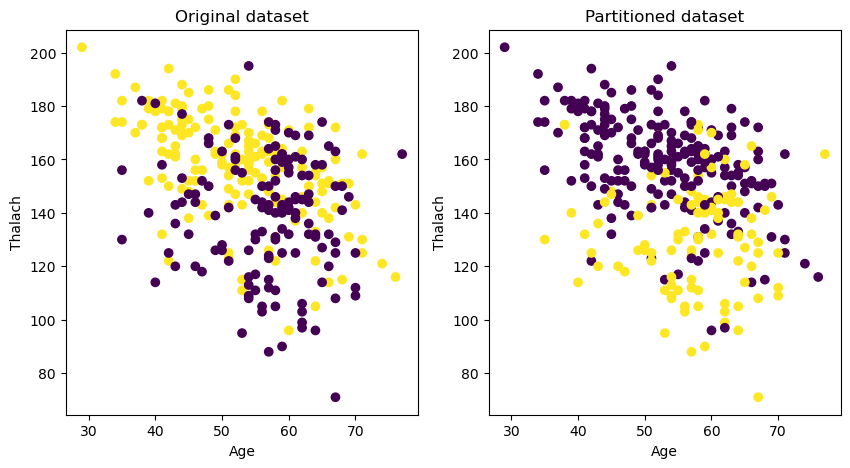

In [23]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(df.age, df.thalach, c=df.target)
plt.title('Original dataset')
plt.xlabel('Age')
plt.ylabel('Thalach')

plt.subplot(1, 2, 2)
plt.scatter(df.age, df.thalach, c=cluster_heart.labels_)
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.title('Partitioned dataset')

plt.show()